In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#create a class that inherits a nn.module
class Model(nn.Module):
    #Input layer(4 neurons) -->
    #H1(n neurons) -->
    #H2(n neurons) -->
    #Output layer(3 classes)
    def __init__(self,inf=4,h1=8,h2=8,out=3):
        super().__init__()
        self.fc1=nn.Linear(inf,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [4]:
#manual seed for randomization
torch.manual_seed(41)
#Create an instance of model
model=Model()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import load_iris

In [7]:
data=load_iris()

In [8]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
x=data['data']
y=data['target']

In [10]:
print(x,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [13]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

c:\Users\bmbar\anaconda3\envs\tf\lib\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [16]:
epoch=100
losses=[]
for i in range(epoch):
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f"Epoch : {i} and loss : {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch : 0 and loss : 1.1318365335464478
Epoch : 10 and loss : 0.9658561944961548
Epoch : 20 and loss : 0.678993821144104
Epoch : 30 and loss : 0.40048947930336
Epoch : 40 and loss : 0.2250950187444687
Epoch : 50 and loss : 0.12207334488630295
Epoch : 60 and loss : 0.07481689751148224
Epoch : 70 and loss : 0.05451279878616333
Epoch : 80 and loss : 0.04437493905425072
Epoch : 90 and loss : 0.03837944194674492


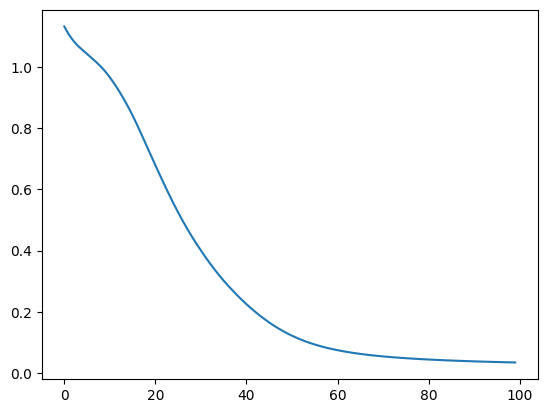

In [17]:
plt.plot(range(epoch),losses)

Evaluation

In [18]:
with torch.no_grad():
    y_eval=model.forward(x_test)
    loss=criterion(y_eval,y_test)
    

In [19]:
loss

tensor(0.1458)

In [21]:
cor=0
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val=model.forward(data)
        print(f"{i+1}.){str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        if y_val.argmax().item() == y_test[i]:
            cor+=1

print(f'We got {cor} correct')

1.)tensor([-7.7212,  1.5826,  4.8685]) 	 2 	 2
2.)tensor([-10.2316,   0.5146,   8.7767]) 	 2 	 2
3.)tensor([-10.7282,   1.1893,   8.2408]) 	 2 	 2
4.)tensor([-4.4743,  3.5419, -1.1241]) 	 1 	 1
5.)tensor([-9.0954,  1.4687,  6.2899]) 	 2 	 2
6.)tensor([-2.2803,  3.7077, -4.1196]) 	 1 	 1
7.)tensor([-7.0740,  2.2070,  3.2966]) 	 2 	 2
8.)tensor([-4.2271,  3.6553, -1.5467]) 	 1 	 1
9.)tensor([-8.0707,  1.8280,  4.7897]) 	 2 	 2
10.)tensor([-10.8583,   0.5051,   9.3761]) 	 2 	 2
11.)tensor([-6.8676,  2.2165,  3.0858]) 	 2 	 2
12.)tensor([  9.4382,   3.2638, -18.8717]) 	 0 	 0
13.)tensor([  8.6037,   2.9307, -17.1502]) 	 0 	 0
14.)tensor([-1.0594,  3.1702, -4.7116]) 	 1 	 1
15.)tensor([  8.0310,   3.2450, -16.7844]) 	 0 	 0
16.)tensor([-6.7105,  2.4191,  2.6637]) 	 2 	 2
17.)tensor([  8.4678,   3.0888, -17.1317]) 	 0 	 0
18.)tensor([-7.6060,  1.7034,  4.5701]) 	 1 	 2
19.)tensor([  9.8628,   3.2141, -19.4757]) 	 0 	 0
20.)tensor([  7.7276,   2.8980, -15.7355]) 	 0 	 0
21.)tensor([-1.6920,  